In [1]:
import numpy as np
import pandas as pd
from plot import plr_plot as plot
from numba import njit
from time import time

In [2]:
@njit
def train_step(lr, n_iters, x, y):
    m = x.size
    w4, w3, w2, w1, b = 0.0, 0.0, 0.0, 0.0, 0.0
    history = np.zeros(n_iters // 1000 + 1)
    idx = 0
    for i in range(n_iters):
        y_pred = w4 * (x ** 4) + w3 * (x ** 3) + w2 * (x ** 2) + w1 * x + b
        error  = y_pred - y

        dw4 = (1 / m) * np.dot(error, x**4)       
        dw3 = (1 / m) * np.dot(error, x**3)
        dw2 = (1 / m) * np.dot(error, x**2)
        dw1 = (1 / m) * np.dot(error, x)
        db  = (1 / m) * np.sum(error)

        w4 -= lr * dw4
        w3 -= lr * dw3
        w2 -= lr * dw2
        w1 -= lr * dw1
        b  -= lr * db

        if i % 1000 == 0 or i == n_iters - 1:
            cost = sec(y_pred, y)
            history[idx] = cost
            idx += 1
    return w4, w3, w2, w1, b, history

In [3]:
def train(lr, n_iters, x, y):
    w4, w3, w2, w1, b, history = train_step(lr, n_iters, x, y)
    for i, cost in enumerate(history):
        print(f"Iteration: {i*1000}, Cost: {cost}")
    return w4, w3, w2, w1, b

In [4]:
# Squared Error Cost Function
@njit
def sec(y_pred, y_true):
    m = y_true.size
    return (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)

In [10]:
def predict(lr, n_iters, x_train, y_train, x_test, y_test):
    st = time()
    w4, w3, w2, w1, b = train(lr, n_iters, x_train, y_train)
    ed = time()
    
    y_train_pred = w4*(x_train**4) + w3*(x_train**3) + w2*(x_train**2) + w1*x_train + b
    y_test_pred  = w4*(x_test**4)  + w3*(x_test**3)  + w2*(x_test**2)  + w1*x_test  + b

    train_cost = sec(y_train_pred, y_train)
    test_cost  = sec(y_test_pred,  y_test)

    print(f"(w4, w3, w2, w1, b) = ({w4:.4f}, {w3:.4f}, {w2:.4f}, {w1:.4f}, {b:.4f})")
    print("Train Cost = ", train_cost)
    print("Test Cost = ", test_cost)
    print(f"Training time: {ed - st:.4f} seconds")

    plot(w4, w3, w2, w1, b, test_cost)


Iteration: 0, Cost: 787.8749391727489
Iteration: 1000, Cost: 67.09258608259722
Iteration: 2000, Cost: 63.79623577534842
Iteration: 3000, Cost: 63.12909606814307
Iteration: 4000, Cost: 62.9782324351976
Iteration: 5000, Cost: 62.929639370732225
Iteration: 6000, Cost: 62.90214699159679
Iteration: 7000, Cost: 62.879793754827276
Iteration: 8000, Cost: 62.85939623677101
Iteration: 9000, Cost: 62.84027750448996
Iteration: 10000, Cost: 62.822254655273355
Iteration: 11000, Cost: 62.805244393851254
Iteration: 12000, Cost: 62.789185603727226
Iteration: 13000, Cost: 62.774024028735944
Iteration: 14000, Cost: 62.759709130821705
Iteration: 15000, Cost: 62.74619334115277
Iteration: 16000, Cost: 62.73343178759056
Iteration: 17000, Cost: 62.72138212254521
Iteration: 18000, Cost: 62.71000437716495
Iteration: 19000, Cost: 62.69926082697853
Iteration: 20000, Cost: 62.6891158657203
Iteration: 21000, Cost: 62.67953588636603
Iteration: 22000, Cost: 62.67048916887326
Iteration: 23000, Cost: 62.66194577422793


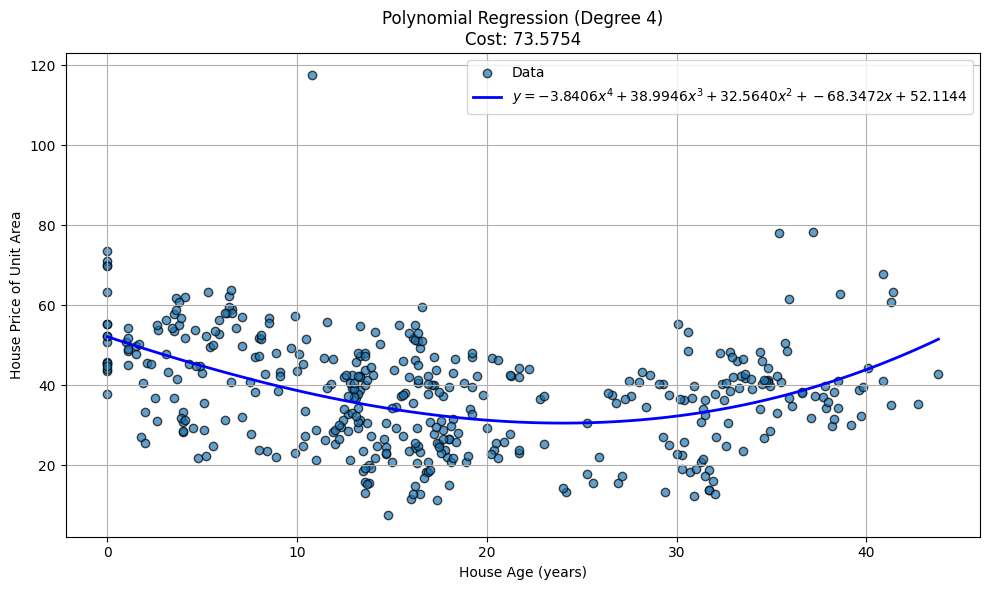

In [13]:
if __name__ == "__main__":
    train_data = pd.read_csv("RealEstate.csv")
    test_data = pd.read_csv("RealEstate_old.csv")
    
    x_train_total = train_data['X2.house.age'].to_numpy()
    y_train_total = train_data['Y.house.price.of.unit.area'].to_numpy()

    x_test_total = test_data['X2 house age'].to_numpy()
    y_test_total = test_data['Y house price of unit area'].to_numpy()
    x_min, x_max = x_train_total.min(), x_train_total.max()

    x_train = (x_train_total - x_min) / (x_max - x_min)
    x_test  = (x_test_total  - x_min) / (x_max - x_min)

    y_train = y_train_total.astype(np.float64)
    y_test = y_test_total.astype(np.float64)

    learning_rate = 0.1
    iterations = 100_000

    predict(learning_rate, iterations, x_train, y_train, x_test, y_test)
